In [74]:
import pandas as pd
import numpy as np
from collections import Counter
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error
from scipy.stats import spearmanr
import xgboost as xgb

alanine - ala - A (gif, interactive)
arginine - arg - R (gif, interactive)
asparagine - asn - N (gif, interactive)
aspartic acid - asp - D (gif, interactive)
cysteine - cys - C (gif, interactive)
glutamine - gln - Q (gif, interactive)
glutamic acid - glu - E (gif, interactive)
glycine - gly - G (gif, interactive)
histidine - his - H (gif, interactive)
isoleucine - ile - I (gif, interactive)
leucine - leu - L (gif, interactive)
lysine - lys - K (gif, interactive)
methionine - met - M (gif, interactive)
phenylalanine - phe - F (gif, interactive)
proline - pro - P (gif, interactive)
serine - ser - S (gif, interactive)
threonine - thr - T (gif, interactive)
tryptophan - trp - W (gif, interactive)
tyrosine - tyr - Y (gif, interactive)
valine - val - V (gif, interactive)

In [99]:
Amino_list=['A','R','N','D','C','Q','E','G','H','I','L','K','M','F','P','S','T','W','Y','V']

In [100]:
training=pd.read_csv('train.csv')

In [101]:
training_update=pd.read_csv('train_updates_20220929.csv')

In [102]:
training.shape

(31390, 5)

### Remove erroneous data

In [103]:
for row in training_update['seq_id']:
    index=training[training['seq_id']==row].index
    training.drop(index=index,inplace=True)

In [104]:
training.shape

(28956, 5)

In [105]:
training.sort_values('tm',ascending=False,inplace=True)
training.reset_index(inplace = True)
training.drop(['index','data_source'],axis=1,inplace=True)

In [106]:
training['length']=training['protein_sequence'].apply(len)

In [107]:
training.describe()

,seq_id,pH,tm,length
count,28956.000000,28670.000000,28956.000000,28956.000000
mean,15744.916529,6.872918,51.360399,450.770928
std,9251.179714,0.792550,12.060858,415.210465
min,0.000000,1.990000,25.100000,5.000000
25%,7526.750000,7.000000,43.600000,212.000000
50%,15587.500000,7.000000,48.800000,352.000000
75%,23902.250000,7.000000,54.600000,537.000000
max,31389.000000,11.000000,130.000000,8798.000000


In [142]:
training.drop(columns = 'seq_id', inplace = True)

In [108]:
training.head(10)

,seq_id,protein_sequence,pH,tm,length
0,14318,MKKFLLVAVVGLAGITFANEQLAKQKGCMACHDLKAKKVGPAFADV...,7.00,130.0,98
1,14319,MKKFLLVAVVGLAGITFANEQLAKQKGCMACHDLKAKKVGPAFADV...,7.00,116.0,98
2,14425,MKKYTCTVCGYIYNPEDGDPDNGVNPGTDFKDLPDDWVCPLCGVGK...,9.08,111.8,54
3,14424,MKKYTCTVCGYIYNPEDGDPDNGINPGTDFKDIPDDWVCPLCGVGK...,9.08,109.5,54
4,28464,MVEQDPFEIAVKQLERAAQYMDISEEALEFLKRPQRIVEVSIPVEM...,7.00,108.5,419
5,28463,MVEQDPFEIAVKQLERAAQYMDISEEALEFLKRPQRIVEVSIPVEM...,7.00,103.5,419
6,16392,MLSRAVCGTSRQLAPVLGYLGSRQKHSLPDLPYDYGALEPHINAQI...,7.80,103.0,222
7,22517,MRVDYEISEQALEAVVLCALKGIEGVRALEAVPRSLADVFRRGRPV...,7.00,99.0,111
8,22019,MRLLNGTPLALALPEAFLYHGASVFTTLRAEGGRPLWLEEHLARLR...,7.00,98.8,245
9,20328,MPISRYYDVKRDEKGERYLEPYVTGFLLLRLPLLNKGTAFTEEERR...,7.00,98.8,575


[None]

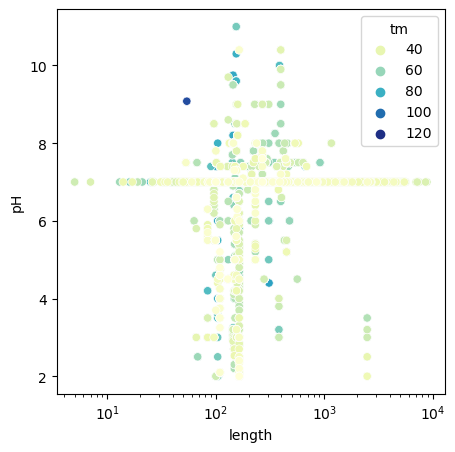

In [85]:
fig, ax= plt.subplots(1, 1, figsize= (5,5))
ax=sns.scatterplot(x='length', y='pH', data=training, palette='YlGnBu', hue='tm')
ax.set(xscale="log")

<AxesSubplot:xlabel='length', ylabel='pH'>

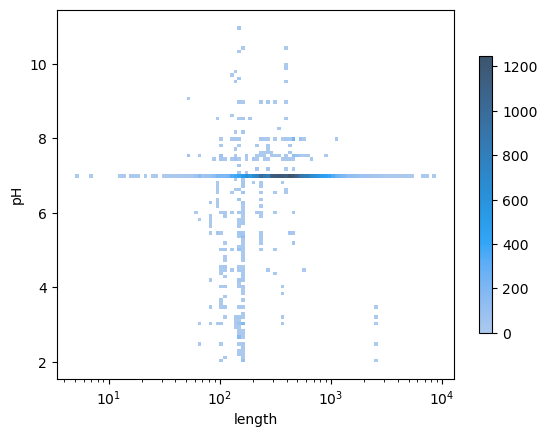

In [86]:
sns.histplot(
    training, x='length', y='pH',
    bins=100, discrete=(False, False), log_scale=(True, False),
    cbar=True, cbar_kws=dict(shrink=.75),
)

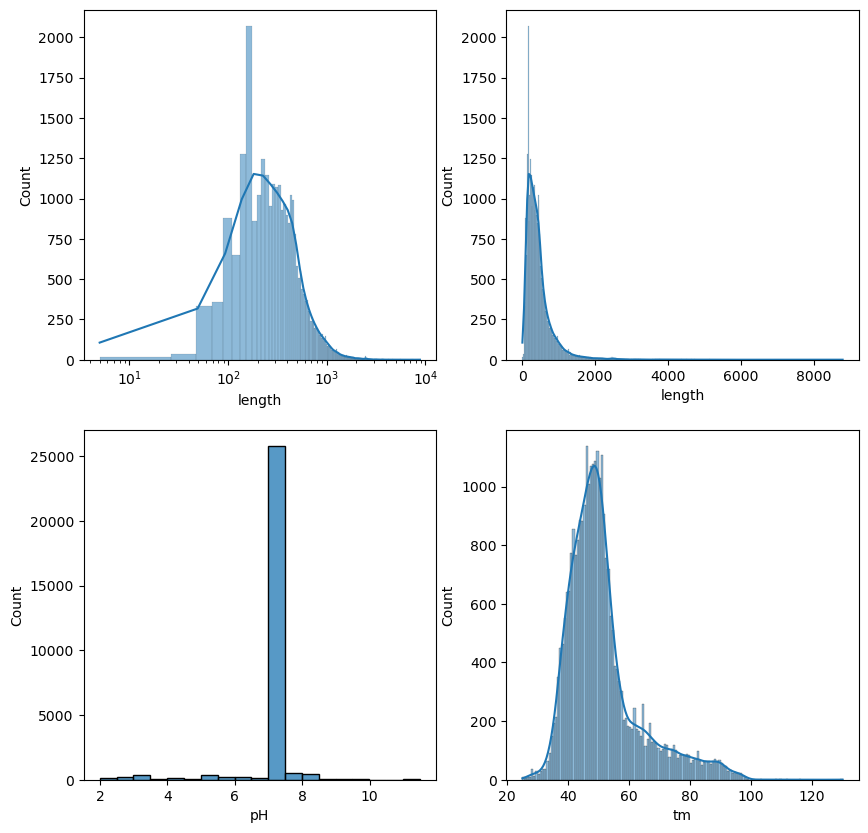

In [87]:
fig, ax= plt.subplots(2, 2, figsize= (10,10))
ax[0,0]=sns.histplot(training['length'], kde=True, ax=ax[0,0])
ax[0,0].set(xscale="log")
ax[0,1]=sns.histplot(training['length'], kde=True, ax=ax[0,1])
ax[1,0]=sns.histplot(training['pH'],binwidth=0.5, ax=ax[1,0])
ax[1,1]=sns.histplot(training['tm'], kde=True, ax=ax[1,1])

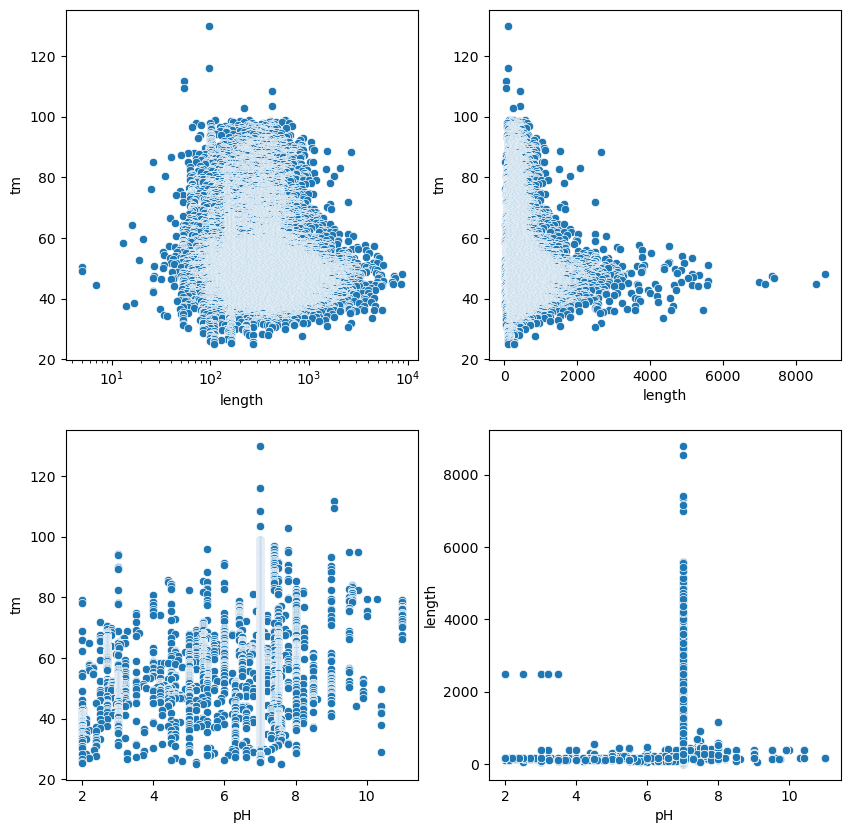

In [88]:
fig, ax= plt.subplots(2, 2, figsize= (10,10))
ax[0,0]=sns.scatterplot(x='length', y='tm', data=training,ax=ax[0,0])
ax[0,0].set(xscale="log")
ax[0,1]=sns.scatterplot(x='length', y='tm', data=training,ax=ax[0,1])

ax[1,0]=sns.scatterplot(x='pH', y='tm', data=training,ax=ax[1,0])
ax[1,1]=sns.scatterplot(x='pH', y='length', data=training,ax=ax[1,1])

In [109]:
for i in range(training.shape[0]):
    if i==0:
        for j in Amino_list:
            count=training['protein_sequence'][i].count(j)
            training[j]=count
    else: 
        for j in Amino_list:
            count=training['protein_sequence'][i].count(j)
            training[j][i]=count


C:\Users\cni4\AppData\Local\Temp\ipykernel_22912\3179347969.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  training[j][i]=count


In [110]:
training.head(10)

,seq_id,protein_sequence,pH,tm,length,A,R,N,D,C,...,L,K,M,F,P,S,T,W,Y,V
0,14318,MKKFLLVAVVGLAGITFANEQLAKQKGCMACHDLKAKKVGPAFADV...,7.00,130.0,98,15,1,2,5,2,...,8,15,3,3,4,3,2,2,2,9
1,14319,MKKFLLVAVVGLAGITFANEQLAKQKGCMACHDLKAKKVGPAFADV...,7.00,116.0,98,15,1,2,5,2,...,8,15,3,3,4,3,2,2,2,9
2,14425,MKKYTCTVCGYIYNPEDGDPDNGVNPGTDFKDLPDDWVCPLCGVGK...,9.08,111.8,54,0,0,3,8,4,...,2,4,1,2,5,0,3,1,3,5
3,14424,MKKYTCTVCGYIYNPEDGDPDNGINPGTDFKDIPDDWVCPLCGVGK...,9.08,109.5,54,0,0,3,8,4,...,1,4,1,2,5,0,3,1,3,4
4,28464,MVEQDPFEIAVKQLERAAQYMDISEEALEFLKRPQRIVEVSIPVEM...,7.00,108.5,419,41,19,16,25,2,...,20,35,17,9,20,17,26,10,20,36
5,28463,MVEQDPFEIAVKQLERAAQYMDISEEALEFLKRPQRIVEVSIPVEM...,7.00,103.5,419,41,19,16,26,2,...,20,35,17,9,20,17,24,10,20,36
6,16392,MLSRAVCGTSRQLAPVLGYLGSRQKHSLPDLPYDYGALEPHINAQI...,7.80,103.0,222,19,7,14,8,3,...,24,15,3,6,11,10,8,6,10,11
7,22517,MRVDYEISEQALEAVVLCALKGIEGVRALEAVPRSLADVFRRGRPV...,7.00,99.0,111,16,11,1,5,1,...,13,2,1,2,6,3,3,0,2,18
8,22019,MRLLNGTPLALALPEAFLYHGASVFTTLRAEGGRPLWLEEHLARLR...,7.00,98.8,245,24,27,2,5,2,...,51,4,1,10,19,7,10,1,10,13
9,20328,MPISRYYDVKRDEKGERYLEPYVTGFLLLRLPLLNKGTAFTEEERR...,7.00,98.8,575,49,55,11,26,1,...,71,19,8,21,37,21,27,6,29,51


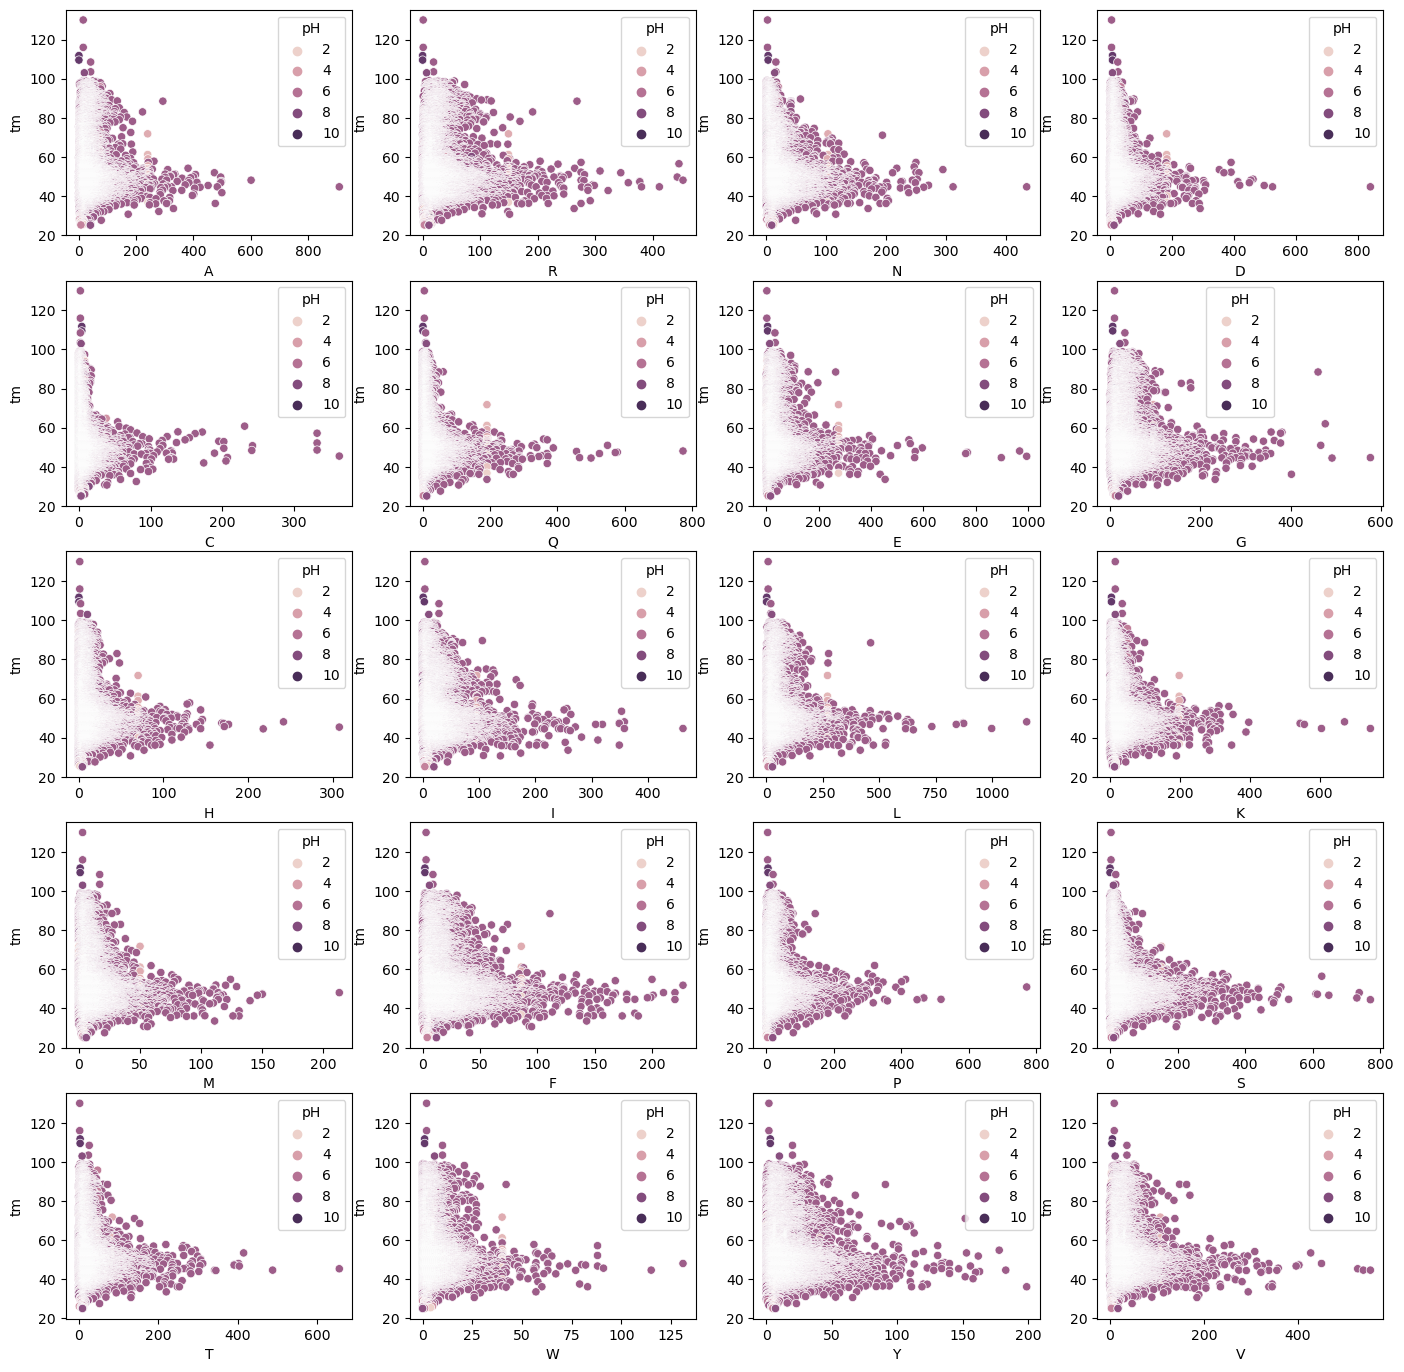

In [91]:
k=0
fig, ax = plt.subplots(5, 4, figsize= (17,17))
for i in range (0,5):
    for j in range(0,4):
        plt
        sns.scatterplot(x=Amino_list[k], y='tm', data=training, hue='pH', ax=ax[i, j])
        k=k+1

<AxesSubplot:ylabel='tm'>

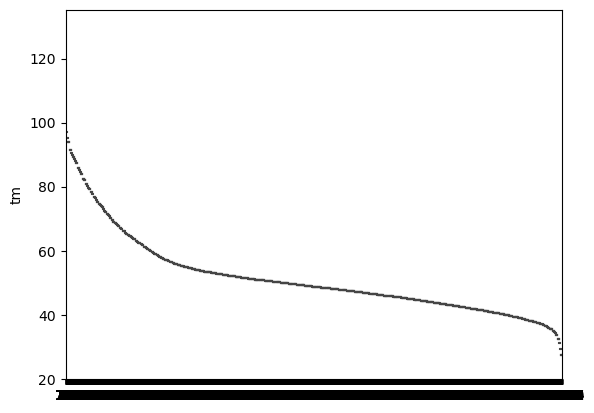

In [174]:
sns.boxplot(x=training.index, y=training['tm'], data=training)

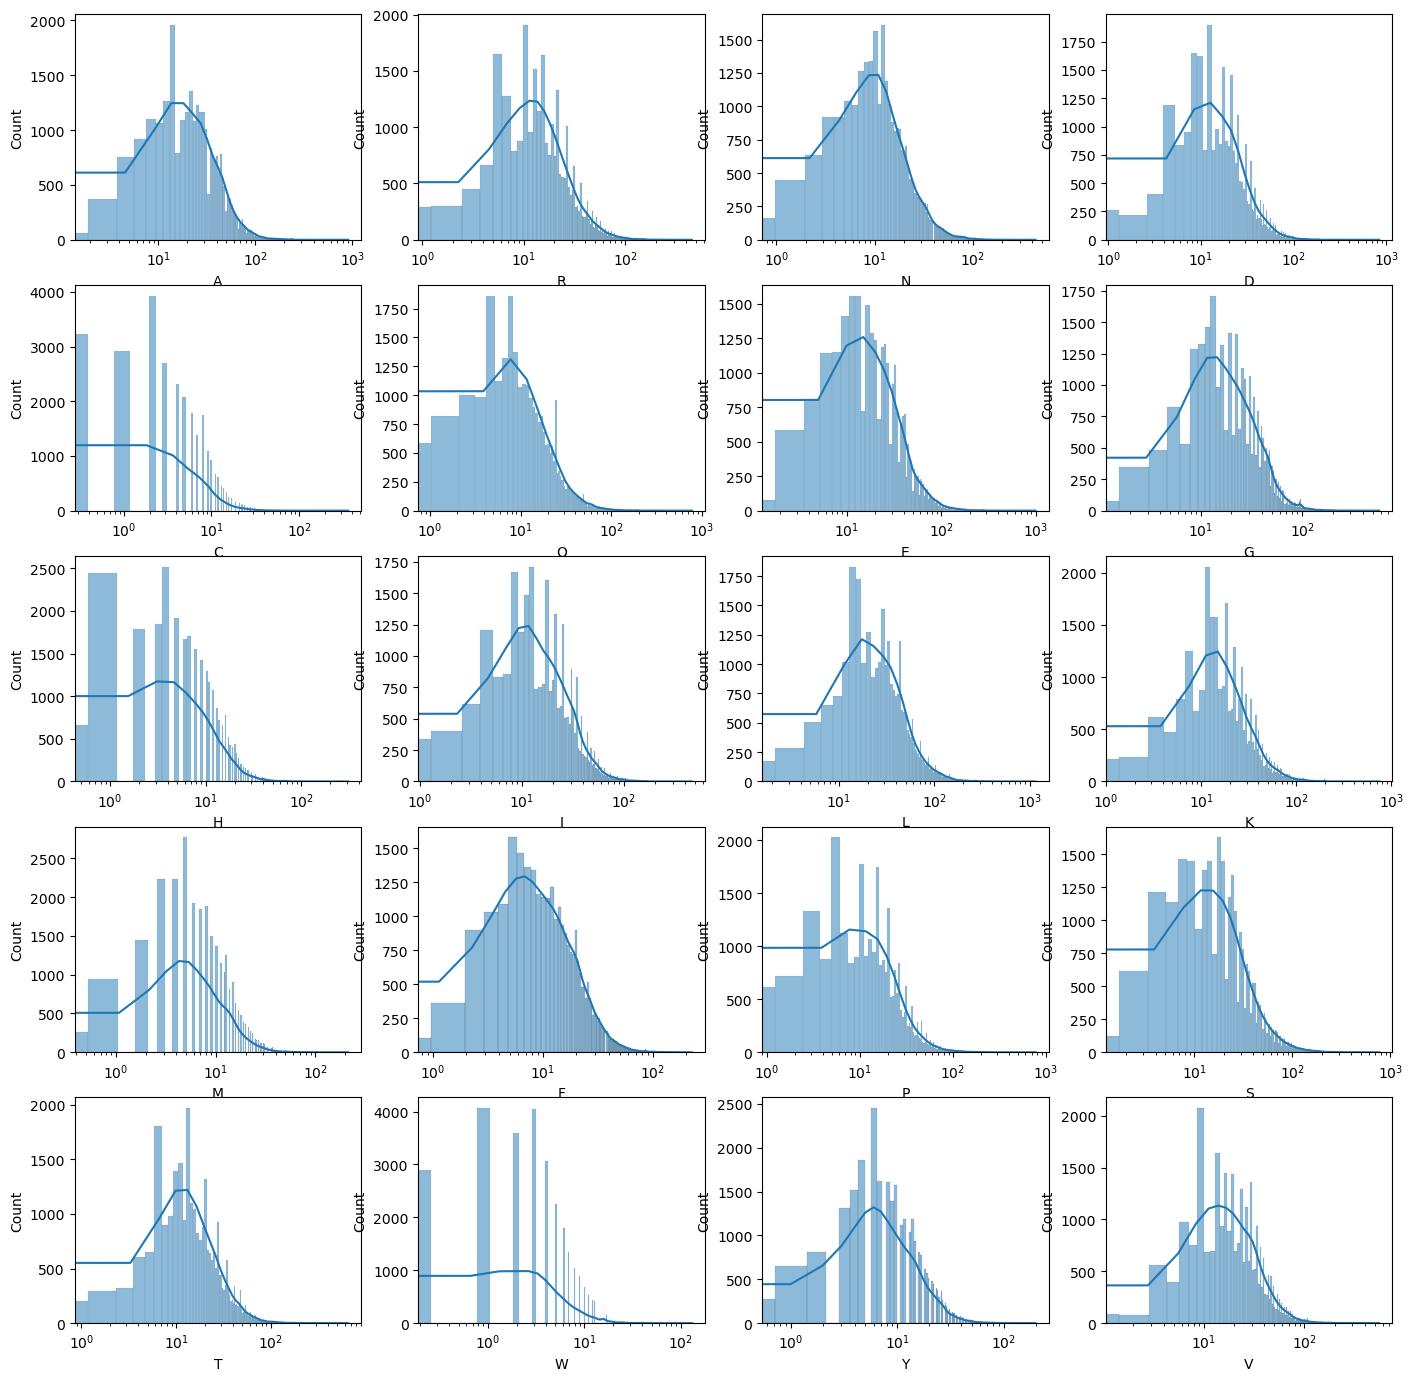

In [93]:
k=0
fig, ax = plt.subplots(5, 4, figsize= (17,17))
for i in range (0,5):
    for j in range(0,4):
        sns.histplot(training[Amino_list[k]], kde=True, ax=ax[i, j])
        ax[i, j].set(xscale="log")
        k=k+1


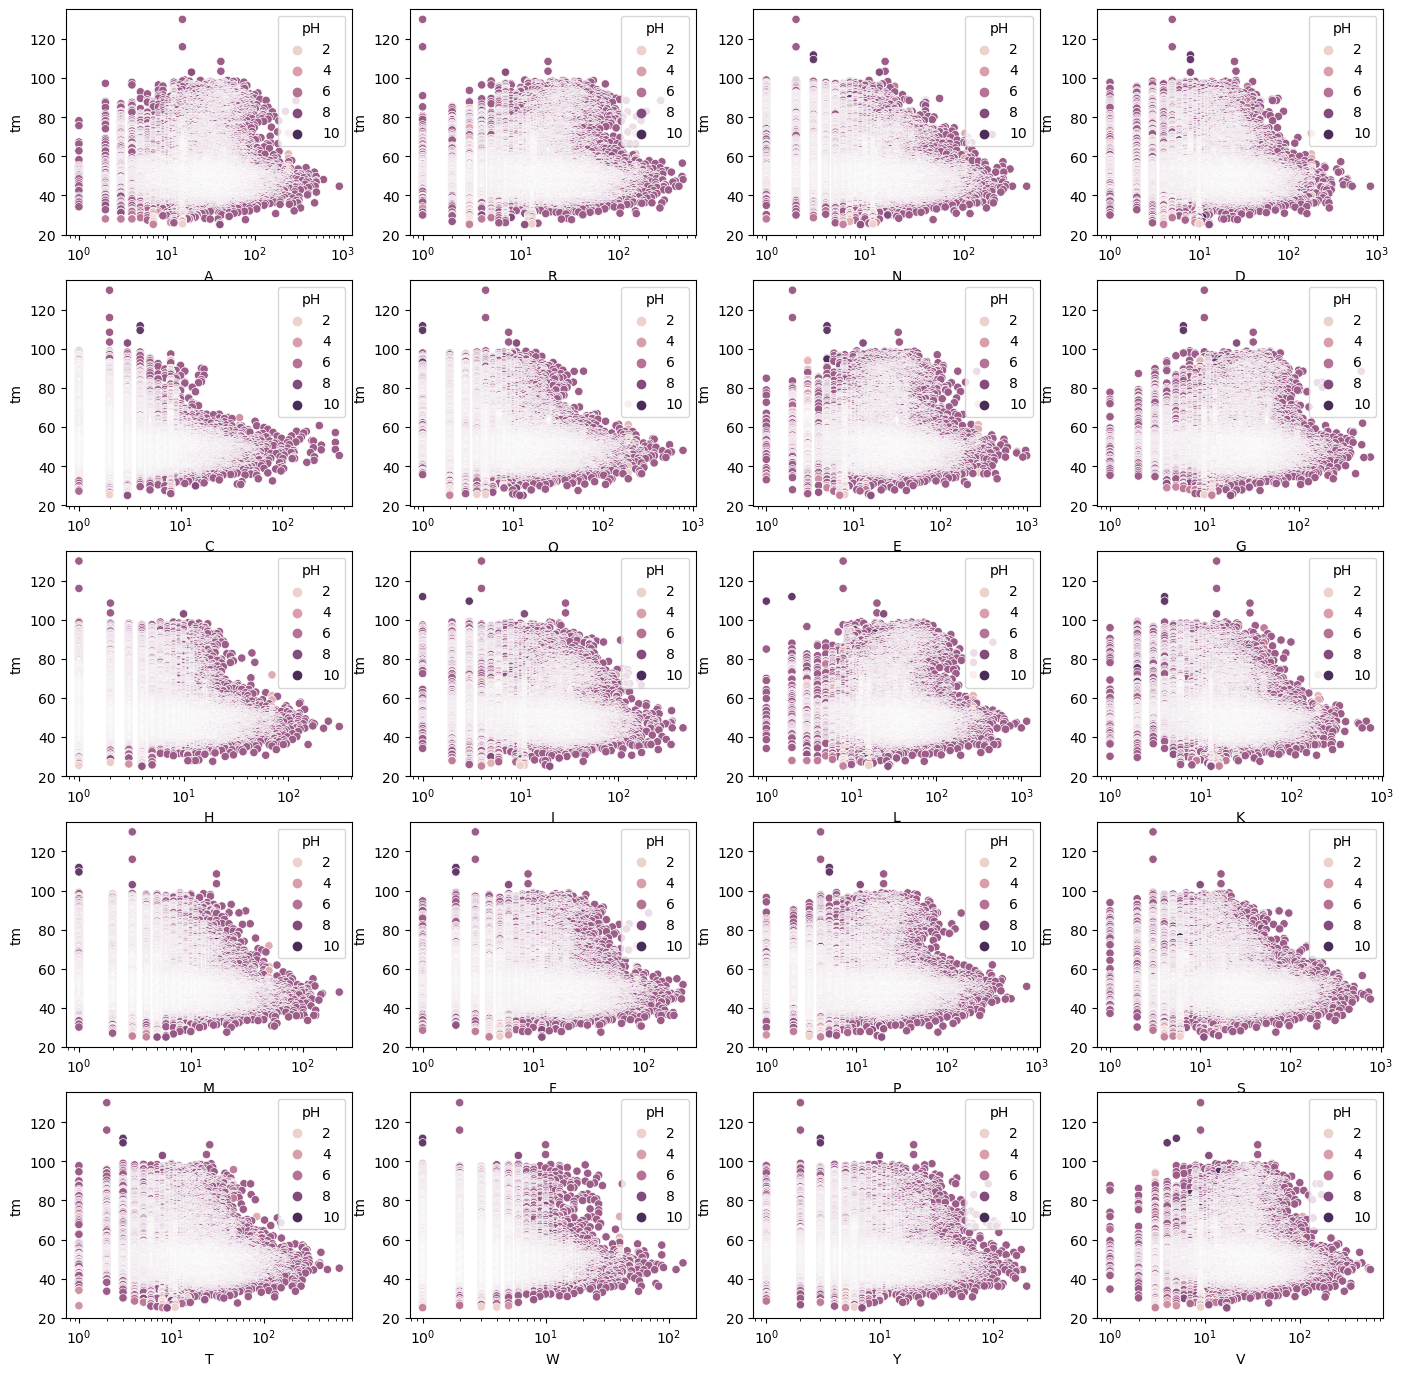

In [94]:
k=0
fig, ax = plt.subplots(5, 4, figsize= (17,17))
for i in range (0,5):
    for j in range(0,4):
        plt
        sns.scatterplot(x=Amino_list[k], y='tm', data=training, hue='pH', ax=ax[i, j])
        ax[i, j].set(xscale="log")
        k=k+1

In [317]:
train = training[training['tm']>55]

X = train.drop(columns = ['tm','protein_sequence'])
y = train['tm']

In [318]:
X_train, X_cv, y_train, y_cv = train_test_split(X, y, test_size = .2, random_state = 3)

In [319]:
model = xgb.XGBRegressor(n_estimators = 200, max_depth = 5)
model.fit(X_train, y_train)
predictions = model.predict(X_cv)

In [320]:
print('Mean Absolute Error =', mean_absolute_error(y_cv, predictions))
print('Mean Absolute Percentage Error = ', mean_absolute_percentage_error(y_cv, predictions))

Mean Absolute Error = 4.9233806339600665
Mean Absolute Percentage Error =  0.07106059230772259


In [325]:
rho, p = spearmanr(y_cv, predictions)
print('Spearman Correlation Coefficient =', rho)

Spearman Correlation Coefficient = 0.7821270754507468


In [322]:
features = pd.Series(model.feature_importances_,index=X.columns).sort_values(ascending=False)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


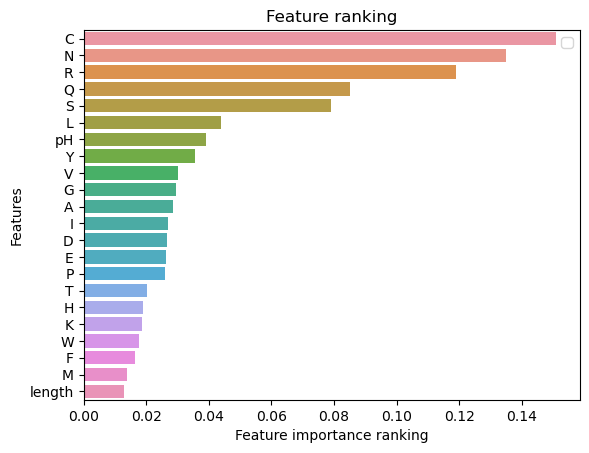

In [326]:
sns.barplot(x=features, y=features.index)
plt.xlabel('Feature importance ranking')
plt.ylabel('Features')
plt.title("Feature ranking")
plt.legend()
plt.show()

In [285]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import regularizers

In [286]:
train_tf = training[training['tm']>55].dropna()

Xtf = train_tf.drop(columns = ['tm','protein_sequence']).to_numpy()
ytf = train_tf['tm'].to_numpy().reshape(-1,1)

In [287]:
print(f"pH Max, Min pre normalization: {np.max(Xtf[:,0]):0.2f}, {np.min(Xtf[:,0]):0.2f}")
print(f"Length    Max, Min pre normalization: {np.max(Xtf[:,1]):0.2f}, {np.min(Xtf[:,1]):0.2f}")
print(f"A    Max, Min pre normalization: {np.max(Xtf[:,2]):0.2f}, {np.min(Xtf[:,2]):0.2f}")
print(f"R    Max, Min pre normalization: {np.max(Xtf[:,3]):0.2f}, {np.min(Xtf[:,3]):0.2f}")
norm_l = tf.keras.layers.Normalization(axis=-1)
norm_l.adapt(Xtf)  # learns mean, variance
Xn = norm_l(Xtf)
print(f"pH Max, Min post normalization: {np.max(Xn[:,0]):0.2f}, {np.min(Xn[:,0]):0.2f}")
print(f"Length    Max, Min post normalization: {np.max(Xn[:,1]):0.2f}, {np.min(Xn[:,1]):0.2f}")
print(f"A    Max, Min post normalization: {np.max(Xn[:,2]):0.2f}, {np.min(Xn[:,2]):0.2f}")
print(f"R    Max, Min post normalization: {np.max(Xn[:,3]):0.2f}, {np.min(Xn[:,3]):0.2f}")

print(f"y=tm Max, Min pre normalization: {np.max(ytf[:]):0.2f}, {np.min(ytf[:]):0.2f}")
norm_l_y = tf.keras.layers.Normalization(axis=-1)
norm_l_y.adapt(ytf)  # learns mean, variance
yn = norm_l_y(ytf)
print(f"y=tm Max, Min post normalization: {np.max(yn[:]):0.2f}, {np.min(yn[:]):0.2f}")

pH Max, Min pre normalization: 11.00, 2.00
Length    Max, Min pre normalization: 4525.00, 13.00
A    Max, Min pre normalization: 293.00, 0.00
R    Max, Min pre normalization: 445.00, 0.00
pH Max, Min post normalization: 4.22, -4.94
Length    Max, Min post normalization: 15.95, -1.23
A    Max, Min post normalization: 11.25, -1.24
R    Max, Min post normalization: 22.75, -1.06
y=tm Max, Min pre normalization: 130.00, 55.10
y=tm Max, Min post normalization: 5.45, -1.21


In [288]:
print(Xn.shape, yn.shape) 

(6840, 22) (6840, 1)


In [289]:
Xn.numpy()

array([[ 0.14838246, -0.90396506, -0.60409844, ..., -0.4413673 ,
        -0.9043917 , -0.7913684 ],
       [ 0.14838246, -0.90396506, -0.60409844, ..., -0.4413673 ,
        -0.9043917 , -0.7913684 ],
       [ 2.264115  , -1.0715213 , -1.2437387 , ..., -0.67261606,
        -0.8034594 , -1.0147377 ],
       ...,
       [ 1.1655617 , -0.2489727 ,  0.46196845, ...,  0.02113027,
        -0.70252705, -0.34462994],
       [ 0.14838246, -0.1690027 , -0.30559972, ..., -0.67261606,
        -0.1978654 , -0.00957606],
       [ 0.14838246, -0.67547935, -0.7320265 , ..., -0.4413673 ,
        -1.005324  , -1.1264223 ]], dtype=float32)

In [290]:
X_train, X_cv, y_train, y_cv = train_test_split(Xn.numpy(), yn.numpy(), test_size = .2, random_state = 1)

In [306]:
tf.random.set_seed(1234)  # applied to achieve consistent results
model = Sequential(
    [
        tf.keras.Input(shape=(22,)),
        Dense(500, activation='relu', name = 'layer1',kernel_regularizer=regularizers.l2(0.01)),
        Dense(250, activation='relu', name = 'layer2',kernel_regularizer=regularizers.l2(0.01)),
        Dense(25, activation='relu', name = 'layer3',kernel_regularizer=regularizers.l2(0.01)),
        Dense(1, activation='linear', name = 'layer4')
     ]
)

In [307]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 layer1 (Dense)              (None, 500)               11500     
                                                                 
 layer2 (Dense)              (None, 250)               125250    
                                                                 
 layer3 (Dense)              (None, 25)                6275      
                                                                 
 layer4 (Dense)              (None, 1)                 26        
                                                                 
Total params: 143,051
Trainable params: 143,051
Non-trainable params: 0
_________________________________________________________________


In [308]:
W1, b1 = model.get_layer("layer1").get_weights()
W2, b2 = model.get_layer("layer2").get_weights()
print(f"W1{W1.shape}:\n", W1, f"\nb1{b1.shape}:", b1)
print(f"W2{W2.shape}:\n", W2, f"\nb2{b2.shape}:", b2)

W1(22, 500):
 [[ 0.00815649 -0.0290288   0.01750334 ...  0.0173468  -0.0589827
  -0.02384841]
 [-0.0772899  -0.07591686  0.02061563 ... -0.06522836 -0.03298562
   0.0678514 ]
 [-0.02131205 -0.08404472 -0.1066665  ... -0.08108357 -0.09181866
   0.05812436]
 ...
 [-0.06275757  0.09533752 -0.02113061 ... -0.05217829  0.06041034
   0.09646244]
 [-0.10122248  0.03936791 -0.06421655 ...  0.07630352 -0.02078868
   0.03386281]
 [ 0.03203549  0.06918027  0.02567511 ...  0.09509531  0.07143683
  -0.04791817]] 
b1(500,): [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 

In [309]:
model.compile(
    loss = tf.keras.losses.MeanSquaredError(),
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.01),
)

model.fit(
    X_train,y_train,            
    epochs=20,
)

Epoch 1/20
171/171 [==============================] - 1s 3ms/step - loss: 1.6785
Epoch 2/20
171/171 [==============================] - 1s 4ms/step - loss: 0.7295
Epoch 3/20
171/171 [==============================] - 0s 3ms/step - loss: 0.6155
Epoch 4/20
171/171 [==============================] - 0s 3ms/step - loss: 0.5633
Epoch 5/20
171/171 [==============================] - 1s 3ms/step - loss: 0.5577
Epoch 6/20
171/171 [==============================] - 0s 3ms/step - loss: 0.5367
Epoch 7/20
171/171 [==============================] - 0s 3ms/step - loss: 0.5241
Epoch 8/20
171/171 [==============================] - 1s 3ms/step - loss: 0.5260
Epoch 9/20
171/171 [==============================] - 1s 3ms/step - loss: 0.5178
Epoch 10/20
171/171 [==============================] - 1s 3ms/step - loss: 0.5164
Epoch 11/20
171/171 [==============================] - 1s 3ms/step - loss: 0.5115
Epoch 12/20
171/171 [==============================] - 1s 4ms/step - loss: 0.5042
Epoch 13/20
171/171 [====

In [310]:
W1, b1 = model.get_layer("layer1").get_weights()
W2, b2 = model.get_layer("layer2").get_weights()
print("W1:\n", W1, "\nb1:", b1)
print("W2:\n", W2, "\nb2:", b2)

W1:
 [[ 1.9194891e-35 -1.6566306e-35 -5.2328181e-35 ...  4.9122267e-35
  -3.5250441e-35 -7.8727256e-36]
 [ 1.5754125e-35  4.4762948e-35  6.0219634e-36 ... -1.8608231e-35
   3.8706739e-35  4.2286561e-35]
 [ 4.5733299e-36  1.4273056e-35 -5.9181979e-35 ... -1.5751610e-35
  -4.8923214e-35 -3.2286565e-35]
 ...
 [-3.2792915e-35 -3.6312240e-35 -5.5960206e-35 ... -4.6476409e-35
   4.0542582e-35 -3.5441795e-35]
 [ 1.5663144e-35  7.2150859e-36 -2.0000088e-35 ... -3.2067733e-35
  -5.3330273e-35 -1.7961759e-35]
 [-4.9876512e-35 -4.8913456e-35  1.7251351e-35 ...  8.1554383e-36
   2.5301133e-35 -1.5759516e-35]] 
b1: [-0.11794308 -0.04171266 -0.10712651 -0.06511433 -0.1410161  -0.10408411
 -0.01965134 -0.07274393 -0.06090644 -0.08164138 -0.09528013 -0.0984507
 -0.28265426 -0.07393017 -0.04111167 -0.09692103 -0.0318874  -0.12653622
 -0.06887641 -0.04825269 -0.11673117 -0.03070546 -0.06891908 -0.08139149
 -0.156428   -0.01873147 -0.1436626  -0.08089954 -0.0759606  -0.10711373
 -0.11475696 -0.06529862 -

In [311]:
predictions = model.predict(X_cv)
print("predictions = \n", predictions)

43/43 [==============================] - 0s 3ms/step
predictions = 
 [[ 0.70645314]
 [-0.53454995]
 [ 0.26320606]
 ...
 [ 0.46184003]
 [-0.5507585 ]
 [-0.50331515]]


In [312]:
print('Mean Absolute Error =', mean_absolute_error(y_cv, predictions))
print('Mean Absolute Percentage Error = ', mean_absolute_percentage_error(y_cv, predictions))

Mean Absolute Error = 0.48745316
Mean Absolute Percentage Error =  1.2781106


In [313]:
rho, p = spearmanr(y_cv, predictions)
print('Spearman Correlation Coefficient =', rho.round(3))

Spearman Correlation Coefficient = 0.695


In [314]:
predictions = model.predict(X_train)
rho, p = spearmanr(y_train, predictions)
print('Spearman Correlation Coefficient =', rho.round(3))

171/171 [==============================] - 0s 2ms/step
Spearman Correlation Coefficient = 0.709
